In [1]:
from process_helper import *
import numpy as np

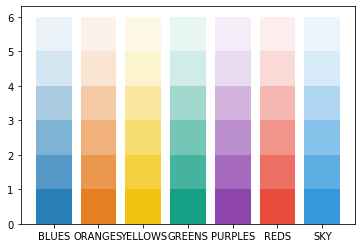

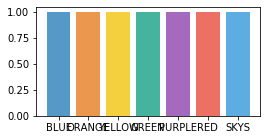

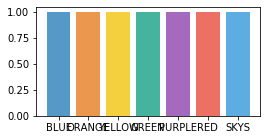

<Figure size 288x144 with 0 Axes>

In [2]:
_, grad_colors = display_colors()
_, bar_colors = select_color_idx(4)
_, line_colors = select_color_idx(4)

In [3]:
plt.rcParams.update({'font.size': 15})
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5

In [4]:
datadir = "../output/"

## Experiment 1: limit = 16k

In [5]:
exp = "exp_scan_10g_fanout250_analysis"

In [6]:
data = [json.loads(line) for line in open(datadir + exp + ".txt")]
df = pd.DataFrame().from_records(data)

In [7]:
df.columns

Index(['abort_cnt_', 'accesses_', 'avg_commit_queue_sz_',
       'avg_log_flush_interval_ (us)', 'avg_log_group_sz_',
       'avg_log_latency_ (us)', 'avg_per_worker_runtime_sec',
       'avg_sum_commit_latency (us)', 'avg_sum_log_flush_latency (us)',
       'bufferd_idx_pgs_', 'cc_time_ms', 'commit_cnt_',
       'commit_latency_perc0_us', 'commit_latency_perc50_us',
       'commit_latency_perc99_us', 'commit_queue_sz_', 'g_buf_entry_sz',
       'g_buf_type', 'g_check_loaded', 'g_commit_group_sz', 'g_commit_pool_sz',
       'g_commit_queue_limit', 'g_cpu_freq', 'g_early_lock_release',
       'g_enable_group_commit', 'g_enable_logging',
       'g_enable_phantom_protection', 'g_force_write', 'g_idx_btree_fanout',
       'g_idx_btree_split_ratio', 'g_index_type', 'g_load_range',
       'g_load_to_remote_only', 'g_log_freq_us', 'g_node_id',
       'g_num_restore_thds', 'g_num_worker_threads', 'g_pagebuf_num_slots',
       'g_partition_sz', 'g_remote_req_retries', 'g_restore_from_remote',
 

In [8]:
# create pivot table
df0 = apply_mask(df, [
    ["g_buf_type", ["eq", "OBJBUF"]],
    ["g_enable_phantom_protection", ["eq", "True"]],
    ["g_total_buf_sz", ["ne", 12000000000]]
])
pivot0_ids = df0.groupby(["g_total_buf_sz"])["throughput_txn_per_sec"].idxmax().values
pivot0 = df0.loc[pivot0_ids].groupby("g_total_buf_sz")[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "remote_scans_", "commit_cnt_", "remote_scan_time_ms",
    "accesses_"].median()
pivot0

,throughput_txn_per_sec,abort_cnt_,hit_rate_,misses_,avg_log_group_sz_,avg_sum_log_flush_latency (us),avg_log_latency_ (us),avg_log_flush_interval_ (us),num_flushes_,remote_scans_,commit_cnt_,remote_scan_time_ms,accesses_
g_total_buf_sz,,,,,,,,,,,,,
3000000000,501.923,0,0.840311,497980,11.6191,10629.5,3403.36,11560.3,5191,10073,60309,959902,3118433
6000000000,1234.380,0,0.924289,578375,30.7816,12063.0,1863.84,12449.5,4821,12211,148360,943624,7639223
9000000000,3352.460,0,0.975555,507017,361.1560,53730.5,2021.06,53930.2,1117,11729,403411,676072,20740985
15000000000,4001.100,0,1.000000,0,827.6160,102895.0,1996.91,103345.0,586,0,484983,0,24981620


In [9]:
df1 = apply_mask(df, [
    ["g_buf_type", ["eq", "OBJBUF"]],
    ["g_enable_phantom_protection", ["eq", "False"]],
    ["g_total_buf_sz", ["ne", 12000000000]]
])
pivot1 = df1.groupby([
    "g_total_buf_sz",
])[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "remote_rds_", "commit_cnt_"
    ].max()
pivot1

,throughput_txn_per_sec,abort_cnt_,hit_rate_,misses_,avg_log_group_sz_,avg_sum_log_flush_latency (us),avg_log_latency_ (us),avg_log_flush_interval_ (us),num_flushes_,remote_rds_,commit_cnt_
g_total_buf_sz,,,,,,,,,,,


In [10]:
# create pivot table
df2 = apply_mask(df, [
    ["g_buf_type", ["eq", "PGBUF"]],
    ["g_enable_phantom_protection", ["eq", "True"]],
    ["g_total_buf_sz", ["ne", 12000000000]]
])
pivot2_ids = df2.groupby(["g_total_buf_sz"])["throughput_txn_per_sec"].idxmax().values
pivot2 = df2.loc[pivot2_ids].groupby("g_total_buf_sz")[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", "idx_misses_",
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "remote_rds_", "commit_cnt_", "remote_rd_time_ms",
    "accesses_", "idx_accesses_"].median()
pivot2

,throughput_txn_per_sec,abort_cnt_,hit_rate_,misses_,idx_misses_,avg_log_group_sz_,avg_sum_log_flush_latency (us),avg_log_latency_ (us),avg_log_flush_interval_ (us),num_flushes_,remote_rds_,commit_cnt_,remote_rd_time_ms,accesses_,idx_accesses_
g_total_buf_sz,,,,,,,,,,,,,,,
3000000000,617.910,0,0.956102,182948,4151,13.5682,10894.7,5534.77,10930.1,5493,182948,74516,951866.0000,4167599,328301
6000000000,986.098,0,0.973124,181433,6274,25.2517,12526.2,3954.68,12554.0,4780,181433,120666,972986.0000,6750858,531742
9000000000,1560.640,0,0.984513,169126,8811,51.9392,15825.4,2926.63,15941.6,3764,169126,195458,948967.0000,10920267,861348
15000000000,3847.430,0,1.000000,2,2,824.8140,105704.0,2058.49,106201.0,560,2,461896,11.0119,25829593,2034824


In [11]:
# create pivot table
df3 = apply_mask(df, [
    ["g_buf_type", ["eq", "NOBUF"]]
])
pivot3_ids = df3.groupby(["g_total_buf_sz"])["throughput_txn_per_sec"].idxmax().values
pivot3 = df3.loc[pivot3_ids].groupby("g_total_buf_sz")[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "remote_scans_", "commit_cnt_", "remote_scan_time_ms",
    "accesses_"].median()
pivot3

,throughput_txn_per_sec,abort_cnt_,hit_rate_,misses_,avg_log_group_sz_,avg_sum_log_flush_latency (us),avg_log_latency_ (us),avg_log_flush_interval_ (us),num_flushes_,remote_scans_,commit_cnt_,remote_scan_time_ms,accesses_
g_total_buf_sz,,,,,,,,,,,,,
3000000000,89.9322,0,0.0,662777,1.61649,8127.41,12174.6,8978.78,6683,10818,10802,960600,1218270


[0.3, 0.6, 0.9, 1.3]


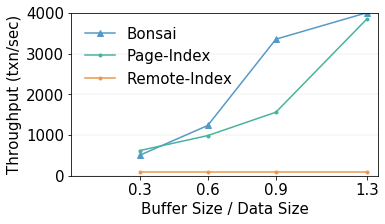

In [13]:
workload_ratio = [round(sz / 10240000000.0 * 10) / 10.0 for sz in pivot0.index]
workload_ratio[-1] = 1.3
print(workload_ratio)
fig, ax = plt.subplots(1, 1)
ax.plot(workload_ratio, 
        pivot0["throughput_txn_per_sec"],
        color=line_colors["BLUE"],
        marker="^", label="Bonsai")
ax.plot(workload_ratio, 
        pivot2["throughput_txn_per_sec"],
        color=line_colors["GREEN"],
        marker=".", label="Page-Index")
ax.plot(workload_ratio, 
        [pivot3["throughput_txn_per_sec"].values] * pivot0.shape[0],
        color=line_colors["ORANGE"],
        marker=".", label="Remote-Index")
# ax.set_title(plot_names[i])
plt.legend(frameon=False, loc="upper left")
ax.set_ylim(0, 4001)
ax.set_xlim(xmin=0)
ax.set_xticks(workload_ratio)
ax.set_xlabel("Buffer Size / Data Size")
ax.set_ylabel("Throughput (txn/sec)")
fig.set_size_inches(5.5, 3)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.25)
path = "/Users/scarlet/Desktop/Bonsai/figures/"
fig.savefig(path + "range_10g_fanout250_limit16k.pdf", bbox_inches="tight") 

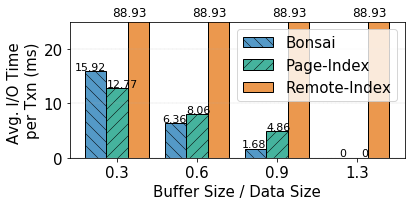

In [43]:
fig, ax = plt.subplots(1, 1)
xvals = np.arange(len(workload_ratio))
width = (1 - 0.2) / 3
val1 = pivot0["remote_scan_time_ms"] / pivot0["commit_cnt_"]
ax.bar(xvals, val1, hatch="\\\\",
       width=width, edgecolor="black", 
       facecolor=bar_colors["BLUE"], label="Bonsai")
# bottom = pivot0["remote_rd_time_ms"] / pivot0["commit_cnt_"] - pivot0["remote_rds_"] / pivot0["commit_cnt_"] * 12.21
# ax.bar(xvals, pivot0["remote_rds_"] / pivot0["commit_cnt_"] * 12.21, 
#        width=width, bottom=bottom.values, edgecolor="black", 
#        facecolor=grad_colors["BLUES"][4], label="Est. Overhead")
val2 = pivot2["remote_rd_time_ms"] / pivot2["commit_cnt_"]
ax.bar(xvals + width, val2,
      width=width, edgecolor="black", hatch="//",
       facecolor=bar_colors["GREEN"], label="Page-Index")
val3 = pivot3["remote_scan_time_ms"] / pivot3["commit_cnt_"]
ax.bar(xvals + width*2, val3,
      width=width, edgecolor="black", 
       facecolor=bar_colors["ORANGE"], label="Remote-Index")
ylim = 25
offset = 0.2
for i, x in enumerate(xvals):
    if val1.iloc[i] == 0: 
        ax.text(x + width*0.5, val1.iloc[i] + offset, "0", color="black", 
            size=11, ha='right')
        ax.text(x + width*1.5, val2.iloc[i] + offset, "0", color="black", 
                size=11, ha='right')
    else:
        ax.text(x + width*0.5, val1.iloc[i] + offset, "%.2f" % val1.iloc[i], color="black", 
                size=11, ha='right')
        ax.text(x + width*0.5, val2.iloc[i] + offset, "%.2f" % val2.iloc[i], color="black", 
                size=11, ha='left')
    #y = pivot3["remote_rd_time_ms"] / pivot3["commit_cnt_"]
    ax.text(x + 0.2, ylim + 1, "%.2f" % val3, color="black", size=12)
ax.set_ylim(0, ylim)
plt.xticks(xvals + width, workload_ratio)
ax.set_xlabel("Buffer Size / Data Size")
ax.set_ylabel("Avg. I/O Time \nper Txn (ms)")
fig.set_size_inches(6, 2.5)
plt.legend(loc = "upper right")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.25)
path = "/Users/scarlet/Desktop/Bonsai/figures/"
fig.savefig(path + "range_10g_fanout250_limit16k_analysis.pdf", bbox_inches="tight") 

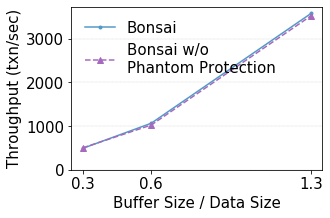

In [41]:
fig, ax = plt.subplots(1, 1)
ax.plot(workload_ratio, 
        pivot0["throughput_txn_per_sec"],
        color=line_colors["BLUE"],
        marker=".", label="Bonsai")
ax.plot(workload_ratio, 
        pivot1["throughput_txn_per_sec"],
        color=line_colors["PURPLE"], linestyle="--",
        marker="^", label="Bonsai w/o \nPhantom Protection")
# ax.set_title(plot_names[i])
plt.legend(frameon=False)
#ax.set_xticks([0, 1, 2, 3], ratio)
ax.set_ylim(ymin=0)
ax.set_xticks(workload_ratio)
ax.set_xlabel("Buffer Size / Data Size")
ax.set_ylabel("Throughput (txn/sec)")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.25)
fig.set_size_inches(4.5, 3)

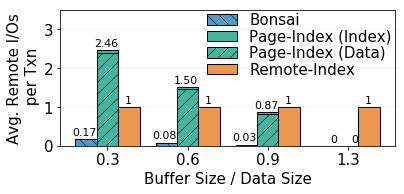

In [45]:
fig, ax = plt.subplots(1, 1)
xvals = np.arange(len(workload_ratio))
width = (1 - 0.2) / 3
#val1 = pivot0["remote_rds_"] / pivot0["commit_cnt_"] * (pivot0["misses_"] / pivot0["remote_rds_"])
val1 = pivot0["remote_scans_"] / pivot0["commit_cnt_"]
ax.bar(xvals, val1,
       width=width, edgecolor="black", hatch="\\\\",
       facecolor=bar_colors["BLUE"], label="Bonsai")
val2 = pivot2["remote_rds_"] / pivot2["commit_cnt_"] #* 7
ax.bar(xvals + width, val2,
      width=width, edgecolor="black", hatch="",
       facecolor=bar_colors["GREEN"], label="Page-Index (Index)")
val2_nonidx = (pivot2["misses_"] - pivot2["idx_misses_"]) / pivot2["commit_cnt_"] #* 7
ax.bar(xvals + width, val2_nonidx,
       width=width, edgecolor="black", hatch="//",
       facecolor=bar_colors["GREEN"], label="Page-Index (Data)")
val3 = pivot3["remote_scans_"] / pivot3["commit_cnt_"] #* (pivot3["misses_"] / pivot3["remote_rds_"])
ax.bar(xvals + width*2, val3,
      width=width, edgecolor="black", 
       facecolor=bar_colors["ORANGE"], label="Remote-Index")
offset = 0.1
ylim = 3.5
for i, x in enumerate(xvals):
    if val1.iloc[i] == 0: 
        ax.text(x + width*0.5, val1.iloc[i] + offset, "0", color="black", 
            size=11, ha='right')
        ax.text(x + width*1.5, val2.iloc[i] + offset, "0", color="black", 
                size=11, ha='right')
    else:
        ax.text(x + width*0.5, val1.iloc[i] + offset, "%.2f" % val1.iloc[i], color="black", 
                size=11, ha='right')
        ax.text(x + width*1.5, val2.iloc[i] + offset, "%.2f" % val2.iloc[i], color="black", 
                size=11, ha='right')
    ax.text(x + width*1.6 + 0.05, val3 + offset, "%.0f" % val3, color="black", size=11)
ax.set_ylim(0, ylim)
plt.xticks(xvals + width, workload_ratio)
ax.set_xlabel("Buffer Size / Data Size")
ax.set_ylabel("Avg. Remote I/Os\n per Txn")
fig.set_size_inches(6, 2.5)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.25)
plt.legend(frameon=False, labelspacing = 0.1, loc="upper right", bbox_to_anchor=(1.03, 1.08))
# plt.legend(ncol=3, loc='upper left', columnspacing = 0.5,
#            handletextpad = 0.25,
#            bbox_to_anchor=(-0.3, 1.35), 
#            frameon=True)
path = "/Users/scarlet/Desktop/Bonsai/figures/"
fig.savefig(path + "range_10g_fanout250_limit16k_misses.pdf", bbox_inches="tight") 

In [ ]:
# what if make a table. 

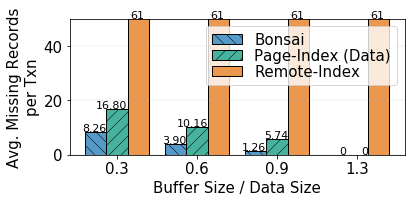

In [46]:
fig, ax = plt.subplots(1, 1)
xvals = np.arange(len(workload_ratio))
width = (1 - 0.2) / 3
#val1 = pivot0["remote_rds_"] / pivot0["commit_cnt_"] * (pivot0["misses_"] / pivot0["remote_rds_"])
val1 = pivot0["misses_"] / pivot0["commit_cnt_"]
ax.bar(xvals, val1,
       width=width, edgecolor="black", hatch="\\\\",
       facecolor=bar_colors["BLUE"], label="Bonsai")
# val2 = pivot2["misses_"] / pivot2["commit_cnt_"] * 7
# ax.bar(xvals + width, val2,
#       width=width, edgecolor="black", hatch="",
#        facecolor=bar_colors["GREEN"], label="Page-Index (Index)")
val2_nonidx = (pivot2["misses_"] - pivot2["idx_misses_"]) / pivot2["commit_cnt_"] * 7
ax.bar(xvals + width, val2_nonidx,
       width=width, edgecolor="black", hatch="//",
       facecolor=bar_colors["GREEN"], label="Page-Index (Data)")
val3 = pivot3["misses_"] / pivot3["commit_cnt_"] #* (pivot3["misses_"] / pivot3["remote_rds_"])
ax.bar(xvals + width*2, val3,
      width=width, edgecolor="black", 
       facecolor=bar_colors["ORANGE"], label="Remote-Index")
offset = 0.2
ylim = 50
for i, x in enumerate(xvals):
    if val1.iloc[i] == 0: 
        ax.text(x + width*0.5, val1.iloc[i] + offset, "0", color="black", 
            size=11, ha='right')
        ax.text(x + width*1.5, val2_nonidx.iloc[i] + offset, "0", color="black", 
                size=11, ha='right')
    else:
        ax.text(x + width*0.5, val1.iloc[i] + offset, "%.2f" % val1.iloc[i], color="black", 
                size=11, ha='right')
        ax.text(x + width*1.5, val2_nonidx.iloc[i] + offset, "%.2f" % val2_nonidx.iloc[i], color="black", 
                size=11, ha='right')
    ax.text(x + width*1.6, ylim + offset, "%.0f" % val3, color="black", size=11)
ax.set_ylim(0, ylim)
plt.xticks(xvals + width, workload_ratio)
ax.set_xlabel("Buffer Size / Data Size")
ax.set_ylabel("Avg. Missing Records\nper Txn")
fig.set_size_inches(6, 2.5)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.25)
plt.legend(frameon=True, labelspacing = 0.07,  loc='upper right')
# plt.legend(ncol=3, loc='upper left', columnspacing = 0.5,
#            handletextpad = 0.25,
#            bbox_to_anchor=(-0.3, 1.35), 
#            frameon=True)
path = "/Users/scarlet/Desktop/Bonsai/figures/"
fig.savefig(path + "range_10g_fanout250_limit16k_record_misses.pdf", bbox_inches="tight") 

In [21]:
df0.loc[pivot0_ids, ["g_total_buf_sz", "cc_time_ms", "idx_time_ms", 
            "commit_latency_perc0_us", "commit_latency_perc50_us", "commit_latency_perc99_us"]]

,g_total_buf_sz,cc_time_ms,idx_time_ms,commit_latency_perc0_us,commit_latency_perc50_us,commit_latency_perc99_us
14,3000000000,56.2159,960430.00,7654.46,17483.4,445287.0
13,6000000000,130.7660,943025.00,7625.07,20529.9,686254.0
12,9000000000,331.4760,639137.00,12895.10,114294.0,908122.0
0,15000000000,421.9430,2439.36,31795.70,207633.0,974280.0
